In [15]:
# Prueba de set 

import cv2 

# Establecer ruta de la imagen a probar 
img = cv2.imread('D:\\ferna\\IA\\Flowers\\flores\\flor_naranja//fn1.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

50 50 3 3


In [14]:
import cv2 
# Inicializar un contador
i = 0
video_path = "D:\\ferna\\IA\\Flowers\\Videos entrenamiento\\V7.mp4"

cap = cv2.VideoCapture(video_path)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    frame = cv2.resize(frame, (50, 50))
    i += 1
    cv2.imwrite('D:\\ferna\\IA\\Flowers\\flores\\flor_amarilla//fa' + str(i) + '.jpg', frame)
    cv2.waitKey(100)

# Libera los recursos
cap.release()
cv2.destroyAllWindows()

In [1]:
# Importar librerías

import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# Librerias para red neuronal 

import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

In [3]:
# Cargar set de imágenes 

import os
import re
import matplotlib.pyplot as plt

# Establecer nombre de la carpeta donde estan las subcarpetas de flores con sus imagenes
dirname = os.path.join(os.getcwd(),'flores')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  D:\ferna\IA\Flowers\flores\
D:\ferna\IA\Flowers\flores\alcatraz 1
D:\ferna\IA\Flowers\flores\camelias 2040
D:\ferna\IA\Flowers\flores\girasol 2040
D:\ferna\IA\Flowers\flores\loto 1020
D:\ferna\IA\Flowers\flores\tulipan 2040
Directorios leidos: 5
Imagenes en cada directorio [2041, 2040, 1020, 2040, 1879]
suma Total de imagenes en subdirs: 9020


In [4]:
# Crear etiquetas 

labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  9020


In [5]:
# nombres de clases
# Las clases se llamaran igual que las subcarpetas 

flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

0 alcatraz
1 camelias
2 girasol
3 loto
4 tulipan


In [6]:
# clases

y = np.array(labels)
X = np.array(images, dtype=np.uint8)

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


In [7]:
# SETS de entrenamiento y TESTs, ver cantidad y  tamaño de las imagenes 

train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (7216, 70, 70, 3) (7216,)
Testing data shape :  (1804, 70, 70, 3) (1804,)


Text(0.5, 1.0, 'Ground Truth : 0')

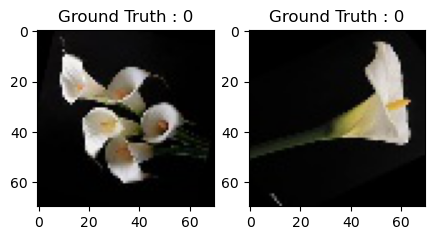

In [8]:
# Mostrar ejemplos 

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

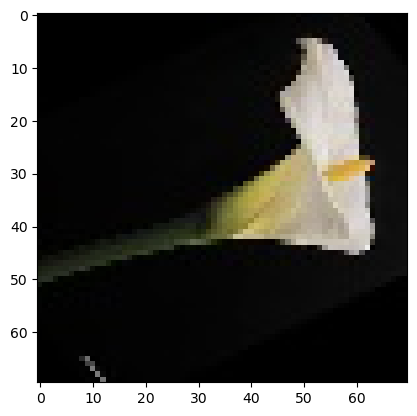

In [9]:
# Preprocesar imagenes 

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

In [10]:
# ONE HOT encoding para red neuronal , dejar todo igual

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0.]


In [11]:
#Mezclar todo y crear los grupos de entrenamiento y testing, dejar todo igual 
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
#Ver tamaño y cantidad de datos 80 y 20

print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(5772, 70, 70, 3) (1444, 70, 70, 3) (5772, 5) (1444, 5)


In [13]:
# Crear modelo de CNN 

#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [14]:
# colocar el nombre del modelo, en este caso es "flower_model"

flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(70,70,3)))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.5))

flower_model.add(Flatten())
flower_model.add(Dense(32, activation='linear'))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(Dropout(0.5))
flower_model.add(Dense(nClasses, activation='softmax'))

In [15]:
#Dejar igual

flower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 70, 70, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 70, 70, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 35, 35, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 35, 35, 32)        0         
                                                                 
 flatten (Flatten)           (None, 39200)             0         
                                                                 
 dense (Dense)               (None, 32)                1254432   
                                                        

In [16]:
flower_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

In [17]:
## Entrenar el modelo para clasificar imágenes, establecer nombre de entrenamiento, aqui es flower_Train

flower_train = flower_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20


91/91 [==============================] - 16s 155ms/step - loss: 1.4950 - accuracy: 0.3177 - val_loss: 1.3207 - val_accuracy: 0.4730
Epoch 2/20
91/91 [==============================] - 14s 151ms/step - loss: 1.2946 - accuracy: 0.4605 - val_loss: 1.1321 - val_accuracy: 0.5658
Epoch 3/20
91/91 [==============================] - 14s 149ms/step - loss: 1.1513 - accuracy: 0.5433 - val_loss: 0.9917 - val_accuracy: 0.6558
Epoch 4/20
91/91 [==============================] - 14s 150ms/step - loss: 1.0462 - accuracy: 0.5913 - val_loss: 0.8921 - val_accuracy: 0.6967
Epoch 5/20
91/91 [==============================] - 14s 149ms/step - loss: 0.9577 - accuracy: 0.6331 - val_loss: 0.8208 - val_accuracy: 0.6967
Epoch 6/20
91/91 [==============================] - 14s 150ms/step - loss: 0.8823 - accuracy: 0.6646 - val_loss: 0.7443 - val_accuracy: 0.7181
Epoch 7/20
91/91 [==============================] - 14s 150ms/step - loss: 0.8380 - accuracy: 0.6783 - val_loss: 0.6797 - val_accuracy: 0.77

In [18]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
# EStablecer ruta donde queremos guardar

flower_model.save("D:\\ferna\\IA\\Flowers\\floresM.h5py")

INFO:tensorflow:Assets written to: D:\ferna\IA\Flowers\floresM.h5py\assets


INFO:tensorflow:Assets written to: D:\ferna\IA\Flowers\floresM.h5py\assets


In [19]:
# Evaluar la red naauronal 



test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)

57/57 [==============================] - 0s 6ms/step - loss: 0.2181 - accuracy: 0.9751


In [20]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])




Test loss: 0.21812300384044647
Test accuracy: 0.975055456161499


In [21]:
flower_train.history




{'loss': [1.4949649572372437,
  1.2945939302444458,
  1.1513110399246216,
  1.0461931228637695,
  0.957748293876648,
  0.8823064565658569,
  0.838011622428894,
  0.773549497127533,
  0.7078960537910461,
  0.6711451411247253,
  0.6251254677772522,
  0.5815348029136658,
  0.5455010533332825,
  0.5114477276802063,
  0.4793068468570709,
  0.4598746597766876,
  0.42854657769203186,
  0.4154767692089081,
  0.3883541226387024,
  0.37342438101768494],
 'accuracy': [0.3177408277988434,
  0.46049895882606506,
  0.5433125495910645,
  0.5913028120994568,
  0.633056104183197,
  0.664587676525116,
  0.6782744526863098,
  0.7120581865310669,
  0.7434164881706238,
  0.765072762966156,
  0.790194034576416,
  0.8016285300254822,
  0.8258835673332214,
  0.8348925709724426,
  0.8490990996360779,
  0.8567221164703369,
  0.8691961169242859,
  0.8737006187438965,
  0.883056104183197,
  0.887040913105011],
 'val_loss': [1.3207285404205322,
  1.13209867477417,
  0.9917442202568054,
  0.8920572996139526,
  0.82

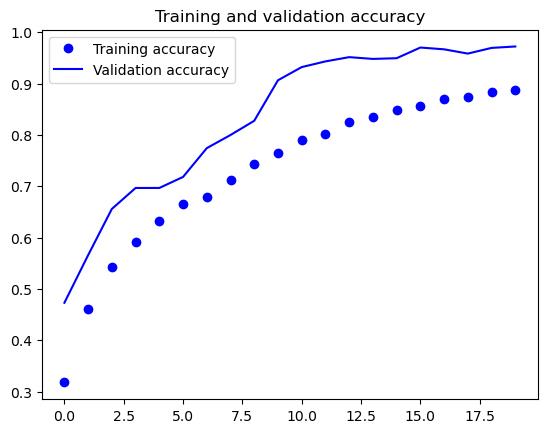

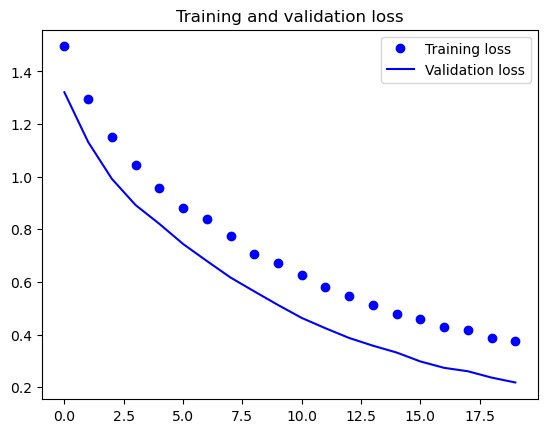

In [22]:
# Verificar tabla de datos 


accuracy = flower_train.history['accuracy']
val_accuracy = flower_train.history['val_accuracy']
loss = flower_train.history['loss']
val_loss =flower_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
predicted_classes2 = flower_model.predict(test_X)

57/57 [==============================] - 0s 6ms/step


In [24]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [25]:
predicted_classes.shape, test_Y.shape

((1804,), (1804,))

Found 1759 correct labels


C:\Users\ferna\AppData\Local\Temp\ipykernel_16288\630422569.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i + 1)


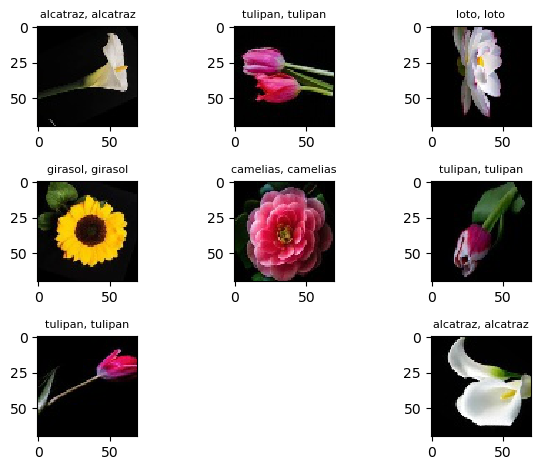

In [26]:
# Etiquetas correctas
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_X[correct].reshape(70, 70, 3), cmap='gray', interpolation='none')
    
    # Use fontsize parameter to set the text size
    plt.title("{}, {}".format(flores[predicted_classes[correct]], flores[test_Y[correct]]), fontsize=8)

    plt.tight_layout()

# Display the plot
plt.show()


Found 45 incorrect labels


C:\Users\ferna\AppData\Local\Temp\ipykernel_16288\686689115.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


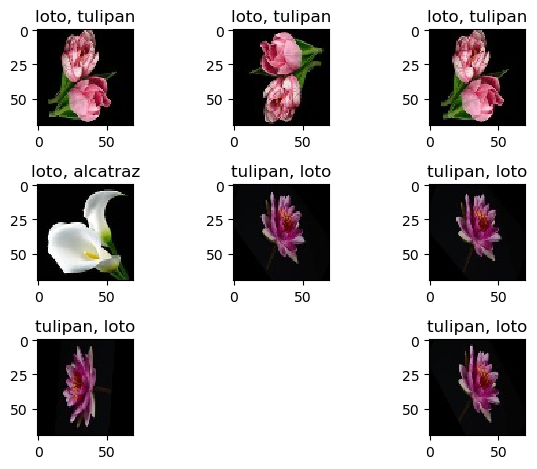

In [28]:
# Etiquetas incorrectas 

incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(70,70,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[incorrect]],
                                                    flores[test_Y[incorrect]]))
    plt.tight_layout()

In [29]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99       397
     Class 1       1.00      1.00      1.00       393
     Class 2       0.99      1.00      1.00       187
     Class 3       0.95      0.96      0.95       431
     Class 4       0.95      0.95      0.95       396

    accuracy                           0.98      1804
   macro avg       0.98      0.98      0.98      1804
weighted avg       0.98      0.98      0.98      1804



Found 1759 correct labels


C:\Users\ferna\AppData\Local\Temp\ipykernel_16288\2967740737.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i + 1)


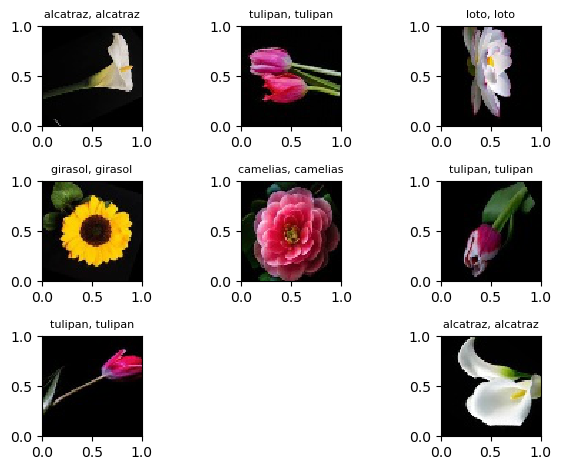

In [30]:
# Etiquetas correctas
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3, 3, i + 1)
    
    # Use extent to control the size of the displayed image
    plt.imshow(test_X[correct].reshape(70, 70, 3), cmap='gray', interpolation='none', extent=[0, 1, 0, 1])
    
    # Use fontsize parameter to set the text size
    plt.title("{}, {}".format(flores[predicted_classes[correct]], flores[test_Y[correct]]), fontsize=8)

    plt.tight_layout()

# Display the plot
plt.show()